> **N-gram** is a sequence of the N-words in the modeling of NLP.

Consider an example of the statement for modeling. “I love reading history books and watching documentaries”. In one-gram or unigram, there is a one-word sequence. As for the above statement, in one gram it can be “I”, “love”, “history”, “books”, “and”, “watching”, “documentaries”. In two-gram or the bi-gram, there is the two-word sequence i.e. “I love”, “love reading”, or “history books”. In the three-gram or the tri-gram, there are the three words sequences i.e. “I love reading”, “history books,” or “and watching documentaries”. The illustration of the N-gram modeling is given below:

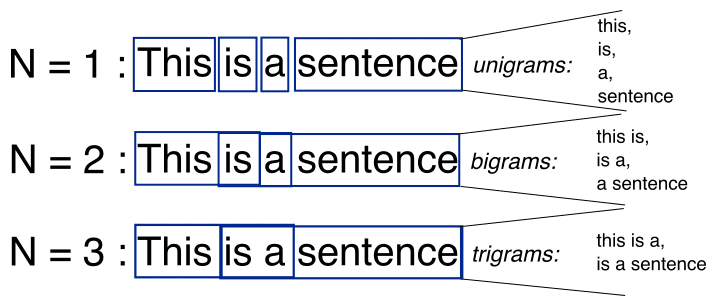

Which N-Gram should be used as a language model?
*   Bigger N, the model will be more accurate. But we may not get good estimates for N-Gram probabilities.
*   Smaller N, the model will be less accurate. But we may get better estimates for N-Gram probabilities.
*   In reality, we do not use higher than trigram (not more than bigram).


In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
class NGramLanguageModel:
    def __init__(self, n):
        self.n = n
        self.vectorizer = CountVectorizer(analyzer='word', ngram_range=(n, n))
    
    def fit_transform(self, corpus):
        return self.vectorizer.fit_transform(corpus)
    
    def transform(self, query):
        return self.vectorizer.transform(query)

In [22]:
def calculate_cosine_similarity(query, matrix):
    similarities = cosine_similarity(query, matrix)
    return similarities

In [23]:
corpus = [
    "Here's Jonathan in his red shirt in the room.",
    "Jonathan was wearing yellow pants taken from the room.",
    "Jonathan was sitting in the room daydreaming."
]

query = "Jonathan is wearing a red shirt and yellow pants in the room."

In [24]:
n = 2

ngram_model = NGramLanguageModel(n)
matrix = ngram_model.fit_transform(corpus)
query = ngram_model.transform([query])

print(f"{n} Gram Model:")
print(pd.DataFrame(matrix.A, columns=ngram_model.vectorizer.get_feature_names_out()))

print(query.A)

2 Gram Model:
   from the  here jonathan  his red  in his  in the  jonathan in  \
0         0              1        1       1       1            1   
1         1              0        0       0       0            0   
2         0              0        0       0       1            0   

   jonathan was  pants taken  red shirt  room daydreaming  shirt in  \
0             0            0          1                 0         1   
1             1            1          0                 0         0   
2             1            0          0                 1         0   

   sitting in  taken from  the room  was sitting  was wearing  wearing yellow  \
0           0           0         1            0            0               0   
1           0           1         1            0            1               1   
2           1           0         1            1            0               0   

   yellow pants  
0             0  
1             1  
2             0  
[[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0

In [26]:
similarities = calculate_cosine_similarity(query, matrix)
data = {
    'Data': corpus,
    'Similarity': similarities[0]
}
df = pd.DataFrame(data)
df

,Data,Similarity
0,Here's Jonathan in his red shirt in the room.,0.530330
1,Jonathan was wearing yellow pants taken from t...,0.353553
2,Jonathan was sitting in the room daydreaming.,0.408248
